# Predicción de la calidad del vino con varias técnicas de clasificación

Integrantes:

- Juan Sebastián Cortés
- Paula Andrea Torres
- Tomás Montealegre
- Carlos Garavito



## Descripción del problema

Se utilizará un conjunto de datos de calidad del vino tinto para construir varios modelos de clasificación para predecir si un vino en particular es de "buena calidad" o no. Cada vino de este conjunto de datos recibe una puntuación de "calidad" entre 0 y 10. Para este proyecto, he convertido el resultado en un resultado binario en el que cada vino es de "buena calidad" (una puntuación de 7 o superior) o no (una puntuación inferior a 7).

## Información general de los datos

La calidad de un vino viene determinada por 11 variables de entrada:

- Acidez fija: Los ácidos fijos son el tartárico, el málico, el cítrico y el succínico, que se encuentran en las uvas (excepto el succínico). Los ácidos son una de las propiedades fundamentales del vino y contribuyen en gran medida a su sabor. La acidez en la comida y la bebida tiene un sabor agrio y picante. Los vinos con mayor acidez se sienten más ligeros porque se perciben como "espumosos". Reducir la acidez de forma significativa puede hacer que los vinos resulten planos. Si prefiere un vino más rico y redondo, disfrute de una acidez ligeramente menor.

- Acidez volátil: Estos ácidos deben ser destilados del vino antes de completar el proceso de producción. Está constituida principalmente por el ácido acético, aunque también pueden estar presentes otros ácidos como el láctico, el fórmico y el butírico. El exceso de ácidos volátiles es indeseable y produce un sabor desagradable.

- Ácido cítrico: Es uno de los ácidos fijos que da al vino su frescura. Normalmente, la mayor parte se consume durante el proceso de fermentación y, a veces, se añade por separado para dar más frescura al vino.

- Azúcar residual: Se refiere al azúcar natural de la uva que queda después de que el proceso de fermentación se detenga o se pare.

- Cloruros: La concentración de cloruros en el vino está influenciada por el terruño y sus niveles más altos se encuentran en los vinos procedentes de países donde el riego se realiza con agua salada o en zonas con terrenos salobres.

- Dióxido de azufre libre: Es la parte del dióxido de azufre que cuando se añade a un vino se dice que está libre después de que la parte restante se ligue. Los bodegueros siempre intentarán conseguir la mayor proporción de azufre libre para ligar. También se conocen como sulfitos y su exceso es indeseable y da un olor acre.

- Dióxido de azufre total: Es la suma total del dióxido de azufre ligado y libre. Se añade principalmente para matar las bacterias dañinas y preservar la calidad y la frescura. Suele haber límites legales para los niveles de azufre en los vinos y su exceso puede llegar a matar la levadura buena y dar un olor indeseable.

- Densidad: Se puede representar como una comparación del peso de un volumen específico de vino con un volumen equivalente de agua. Generalmente se utiliza como medida de la conversión del azúcar en alcohol.

- pH: También conocido como potencial de hidrógeno, es una escala numérica para especificar la acidez o la basicidad del vino. La acidez fija es la que más contribuye al pH de los vinos. Como sabrá, las soluciones con un pH inferior a 7 son ácidas, mientras que las soluciones con un pH superior a 7 son básicas. Con un pH de 7, el agua pura es neutra. La mayoría de los vinos tienen un pH entre 2,9 y 3,9, por lo que son ácidos.

- Sulfatos: Son sales minerales que contienen azufre. Los sulfatos son para el vino lo mismo que el gluten para la comida. Forman parte habitual de la elaboración del vino en todo el mundo y se consideran esenciales. Están relacionados con el proceso de fermentación y afectan al aroma y al sabor del vino.

- Alcohol: Se suele medir en % vol o alcohol por volumen (ABV).

- Calidad: Los expertos en vino califican la calidad del vino entre 0 (muy malo) y 10 (muy excelente). La puntuación de calidad final es la mediana de al menos tres evaluaciones realizadas por los mismos expertos en vino.

## Objetivos

1. Experimentar con diferentes métodos de clasificación para ver cuál produce una mejor clasificación.
2. Determinar qué características son las más características de un vino de buena calidad

## Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [164]:
df_red = pd.read_csv("D:\Documentos\Educacion\Maestria MACC - Universidad Rosario\Ciencia de Datos\Aprendizaje Automatico Maquina I\Proyectos\Proyecto 3 - Clustering\winequality-red.csv",sep=";")
df_white = pd.read_csv("D:\Documentos\Educacion\Maestria MACC - Universidad Rosario\Ciencia de Datos\Aprendizaje Automatico Maquina I\Proyectos\Proyecto 3 - Clustering\winequality-white.csv",sep=";")

In [166]:
df_red['type']='red'
df_white['type']='white'
df = pd.concat([df_red,df_white])

## Análisis Descriptivo

In [167]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [137]:
#getting information about mean,count,std and quartiles of columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


<AxesSubplot:>

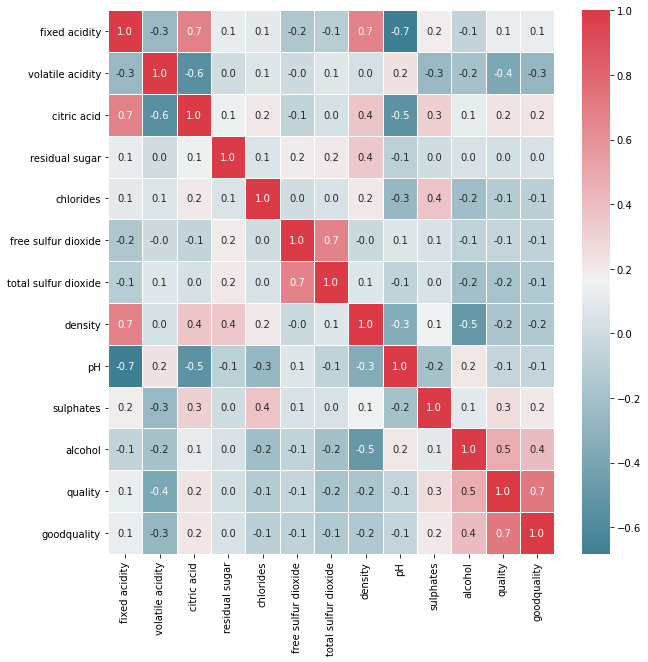

In [147]:
#correlation map to see correlation between variables
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt= '.1f',ax=ax)

La calidad del vino tiene una correlación significativa con el alcohol. Se observa un bajo nivel de correlación entre variables como el ácido cítrico, el dióxido de azufre libre, los sulfatos y el pH. Además, la calidad también tiene una baja correlación negativa con la densidad, la acidez volátil, los cloruros, el dióxido de azufre total y el azúcar residual.

In [184]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality','type'], axis = 1)
y = df['goodquality']

In [171]:
df.groupby("goodquality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
goodquality,,,,,,,,,,,,,
0,5220,5220,5220,5220,5220,5220,5220,5220,5220,5220,5220,5220,5220
1,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

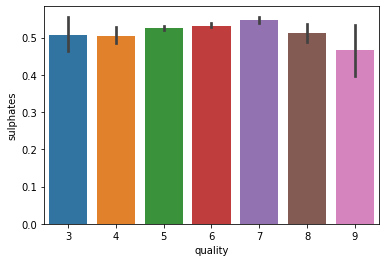

In [172]:
#quality vs sulphates
sns.barplot(x='quality', y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

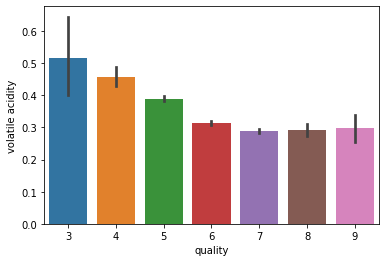

In [173]:
#quality vs volatile acidity
sns.barplot(x = 'quality', y='volatile acidity', data = df)

### Quality in Different Wine Types

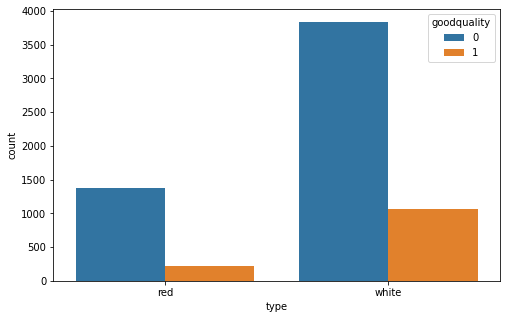

In [174]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'goodquality', data = df)
plt.show()
# 'low'=0, 'high'=1

En el gráfico se puede observar que el vino tinto de baja calidad se repite con mayor frecuencia en el conjunto de datos, así como el vino blanco de baja calidad, los vinos blancos y tintos de alta calidad son poco comunes dentro de nuestro conjunto de datos.

### Quality & Alcohol Relation

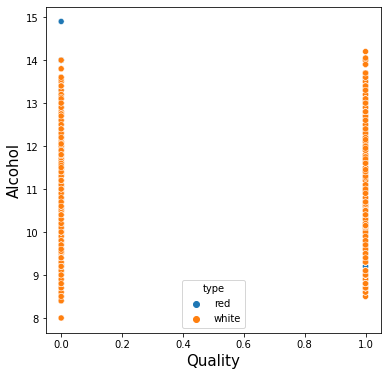

In [175]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='goodquality', 
                y='alcohol',
                hue='type',
                data=df);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

Los vinos tintos y blancos tienen un nivel de alcohol similares, los vinos de alta calidad son en su mayoría vinos tintos y tienen más nivel de alcohol.

### Chlorides Level in Quality Classes

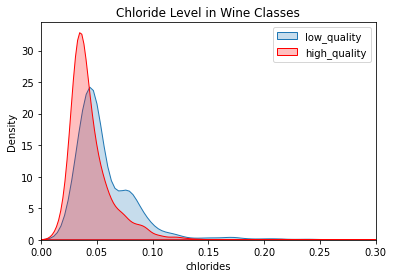

In [176]:
plt.figure(figsize= (6,4))

low_quality = df[df['goodquality']== 0]['chlorides']
high_quality   = df[df['goodquality']== 1][ 'chlorides']
ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)
ax = sns.kdeplot(data= high_quality,label= 'high_quality',shade=True, color= "r")

plt.title("Chloride Level in Wine Classes")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

El nivel de cloruro es un poco más alto en los vinos de buena calidad.

### Fixed Acidity & Volatile Acidity & Citric Acid Density in Quality Classes

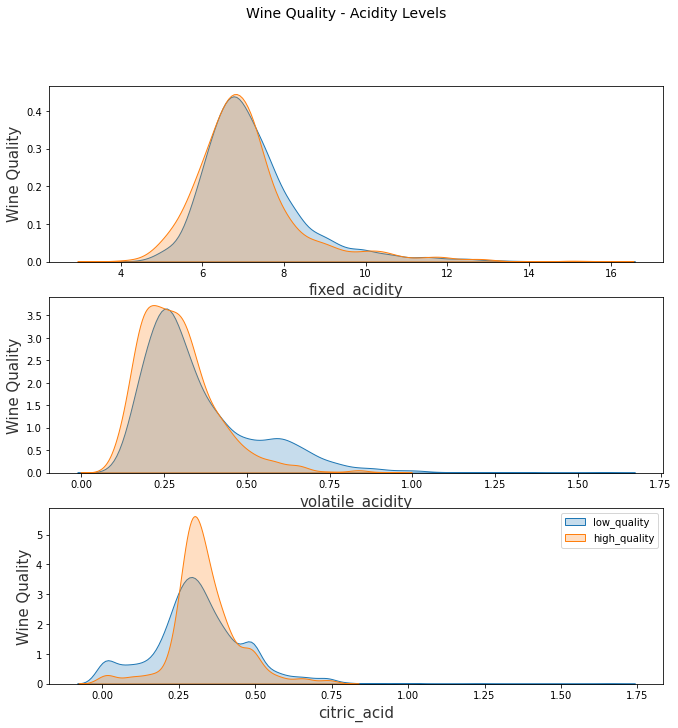

In [177]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (11,11))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)


fixed_acidity_low_quality    = df[df['goodquality']== 0]['fixed acidity']
fixed_acidity_high_quality   = df[df['goodquality']== 1]['fixed acidity']


volatile_acidity_low_quality = df[df['goodquality']== 0]['volatile acidity']
volatile_acidity_high_quality= df[df['goodquality']== 1]['volatile acidity']

citric_acid_low_quality      = df[df['goodquality']== 0]['citric acid']
citric_acid_high_quality     = df[df['goodquality']== 1]['citric acid']


sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True,ax=ax1)
sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)
ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True,ax=ax2)
sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)
ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True,ax=ax3)
sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)
ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)
ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)


plt.legend()
plt.show()


Se puede observar que los niveles de acidez fija y acidez volatil son similares para los vinos de baja y alta calidad. Mientras que el nivel de acidez citrica es un poco más alta en los vinos de alta calidad.

### Residual Sugar Levels by Wine Quality Classes

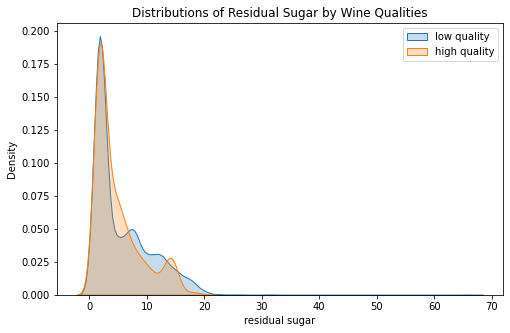

In [178]:
plt.figure(figsize=(8,5))

residual_sugar_low   = df[df['goodquality']== 0]['residual sugar']
residual_sugar_high  = df[df['goodquality']== 1]['residual sugar'] 
ax = sns.kdeplot(data= residual_sugar_low, label= 'low quality', shade=True)
ax = sns.kdeplot(data= residual_sugar_high,   label= 'high quality',   shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")
plt.legend()
plt.show()

El azucar residual es similar para los vinos de baja y alta calidad.

### Sulfur Dioxide Distribution in Wine Quality Classes

Text(0, 0.5, 'free_sulfur_dioxide')

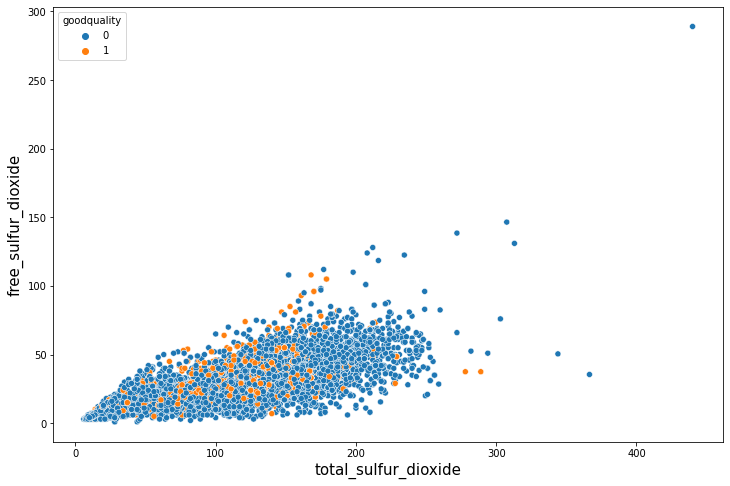

In [179]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='goodquality',data=df);
plt.xlabel('total_sulfur_dioxide',size=15)
plt.ylabel('free_sulfur_dioxide', size =15)

Hay algunos valores extremos en la clase de vino de baja calidad, el nivel de dióxido de azufre total es cada vez más alto en algunas clases de vino de baja calidad.

### pH Level in Wine Quality

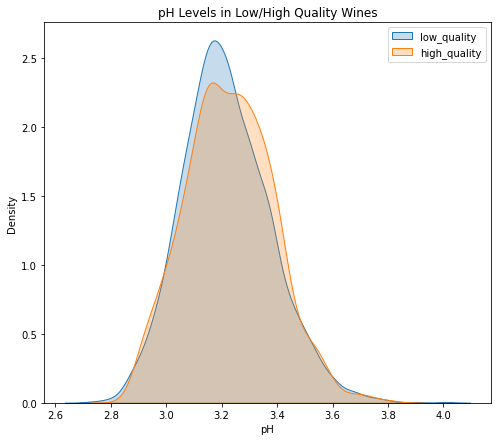

In [180]:
plt.figure(figsize=(8,7))

pH_low_quality  = df[df['goodquality']== 0]['pH']
pH_high_quality = df[df['goodquality']== 1][ 'pH']
ax = sns.kdeplot(data= pH_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= pH_high_quality,label= 'high_quality',   shade=True)

plt.title("pH Levels in Low/High Quality Wines")
plt.xlabel('pH')
plt.legend()
plt.show()

El nivel de PH es un poco más alto para los vinos de alta calidad.

### Density by Wine Quality Classes

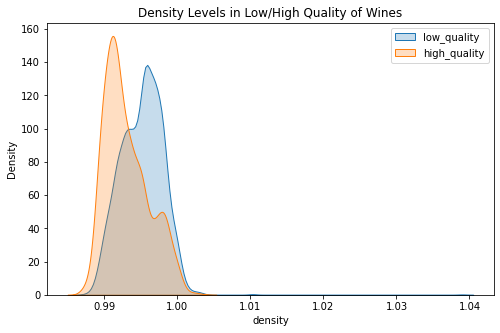

In [181]:
plt.figure(figsize=(8,5))

density_low_quality  = df[df['goodquality']== 0]['density']
density_high_quality = df[df['goodquality']== 1][ 'density']
ax = sns.kdeplot(data= density_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= density_high_quality,label= 'high_quality', shade=True)

plt.title("Density Levels in Low/High Quality of Wines")
plt.xlabel('density')
plt.legend()
plt.show()

El nivel de densidad toma valores más altos para los vinos de baja calidad.

### Sulphate Values in Wine Quality Classes

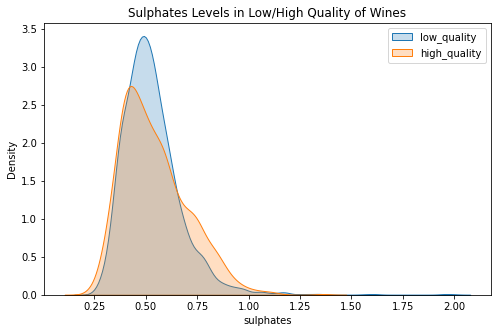

In [182]:
plt.figure(figsize=(8,5))

sulphates_low_quality    = df[df['goodquality']== 0]['sulphates']
sulphates_high_quality   = df[df['goodquality']== 1][ 'sulphates']
ax = sns.kdeplot(data= sulphates_low_quality, label= 'low_quality',  shade=True) 
ax = sns.kdeplot(data= sulphates_high_quality,label= 'high_quality', shade=True)

plt.title("Sulphates Levels in Low/High Quality of Wines")
plt.xlabel('sulphates')
plt.legend()
plt.show()

La concentración de cloruro es más alta para los vinos de buena calidad.

## Preparación Modelamiento

### Preprocesamiento de los datos

Lo primero que se debe hacer es estandarizar los datos, lo cual significa que se transformarán los datos para que su distribución tenga una media de 0 y una desviación estándar de 1, es importante realizar esta actividad para equilibrar el rango de las variables.

In [185]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

### Separación de los datos

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelamiento

### Model 1 - Support Vector Machine

#### Applying Grid Search to find the best model and the best parameters

In [188]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.svm import SVC

# Se definen los parámetros
parameters = [{'C': [0.9,1,1.1,1.2,1.3], 'kernel': ['linear']},
              {'C': [0.9,1,1.1,1.2,1.3], 'kernel': ['rbf'], 'gamma': [0.7, 0.8, 0.9, 1.0]}]

# Se instancia el modelo
SVM = SVC(random_state = 1)

# Se buscan los mejores parámetros
grid_search = GridSearchCV(estimator = SVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs= -1,
                           return_train_score=True) # set this for train score
grid_search = grid_search.fit(X_train, y_train)

In [189]:
print(grid_search.best_score_)

0.8716544390099303


In [190]:
print(grid_search.best_params_)

{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}


In [191]:
print(grid_search.best_estimator_)

SVC(C=1.3, gamma=1.0, random_state=1)


In [192]:
print("Train: ", grid_search.score(X_train, y_train))
print("Test:  ", grid_search.score(X_test, y_test))

Train:  0.9711371945353088
Test:   0.8807692307692307


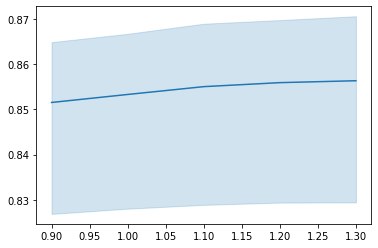

In [193]:
# Score versus C value
sns.lineplot(x=grid_search.cv_results_['param_C'] ,y=grid_search.cv_results_['mean_test_score']);

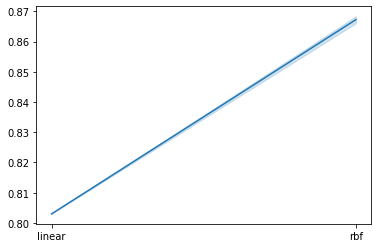

In [194]:
# Score vs selected kernel
sns.lineplot(x=grid_search.cv_results_['param_kernel'] ,y=grid_search.cv_results_['mean_test_score']);

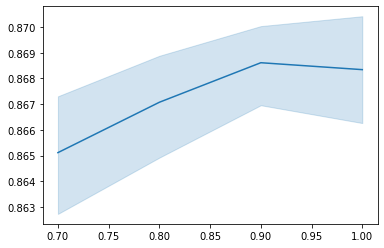

In [195]:
# Score vs Gamma value
sns.lineplot(x=grid_search.cv_results_['param_gamma'] ,y=grid_search.cv_results_['mean_test_score']);

#### Adjust the best model

In [196]:
from sklearn.svm import SVC

# Se instancia el modelo
SVM = SVC(kernel = 'rbf', random_state = 1, gamma=1.0, C=1.3)

# Se ajusta el modelo
SVM.fit(X_train, y_train)

# Se realizan predicciones
y_pred = SVM.predict(X_test)

#### Performance of the best model

In [197]:
train_accuracy = SVM.score(X_train, y_train)
test_accuracy = SVM.score(X_test, y_test)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.97
Accuracy in Test  Group   : 0.88


In [198]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1047
           1       0.80      0.52      0.63       253

    accuracy                           0.88      1300
   macro avg       0.84      0.74      0.78      1300
weighted avg       0.87      0.88      0.87      1300



<AxesSubplot:>

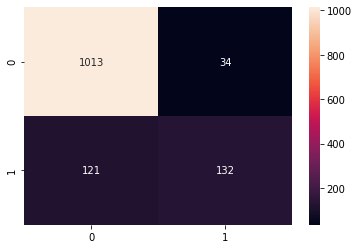

In [199]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

score = round(accuracy_score(y_test, y_pred), 3)
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")

### Model 2 - Tree Decision

#### Applying Grid Search to find the best model and the best parameters

In [200]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.tree import DecisionTreeClassifier

# Se definen los parámetros
parameters = {
    "criterion": ['gini','entropy'],
    "splitter":['best','random'],
    "max_depth":range(2,40,1),
    "min_samples_split" : range(2,10,1),
    "min_samples_leaf" : range(1,10,1),
}

# Se instancia el modelo
DTC = DecisionTreeClassifier(random_state=1)

# Se buscan los mejores parámetros
grid_search = GridSearchCV(estimator = DTC,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs= -1,
                           return_train_score=True) # set this for train score
grid_search = grid_search.fit(X_train, y_train)

In [201]:
print(grid_search.best_score_)

0.8410663998814287


In [202]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [203]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=1)


In [204]:
print("Train: ", grid_search.score(X_train, y_train))
print("Test:  ", grid_search.score(X_test, y_test))

Train:  0.9792187800654224
Test:   0.8361538461538461


#### Adjust the best model

In [205]:
from sklearn.tree import DecisionTreeClassifier

# Se instancia el modelo
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=1)
# Se ajusta el modelo
DTC.fit(X_train, y_train)

# Se realizan predicciones
y_pred = DTC.predict(X_test)

#### Performance of the best model

In [206]:
train_accuracy = DTC.score(X_train, y_train)
test_accuracy = DTC.score(X_test, y_test)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.98
Accuracy in Test  Group   : 0.84


In [207]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1047
           1       0.58      0.60      0.59       253

    accuracy                           0.84      1300
   macro avg       0.74      0.75      0.74      1300
weighted avg       0.84      0.84      0.84      1300



<AxesSubplot:>

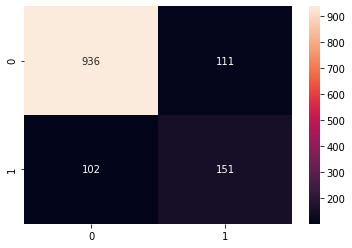

In [208]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

score = round(accuracy_score(y_test, y_pred), 3)
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")

### Model 3 - K Nearest Neighbors

#### Applying Grid Search to find the best model and the best parameters

In [209]:
from sklearn.neighbors import KNeighborsClassifier

parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'metric': ['euclidean']},
              {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'metric': ['manhattan']},
              {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'metric': ['chebyshev']},
              {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'p': [1, 2], 'metric': ['minkowski']}]

# Se instancia el modelo
KNN = KNeighborsClassifier()

# Se buscan los mejores parámetros
grid_search = GridSearchCV(estimator = KNN,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs= -1,
                           return_train_score=True) # set this for train score
grid_search = grid_search.fit(X_train, y_train)

In [210]:
print(grid_search.best_score_)

0.8385582481102712


In [211]:
print(grid_search.best_params_)

{'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 7}


In [212]:
print(grid_search.best_estimator_)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=7)


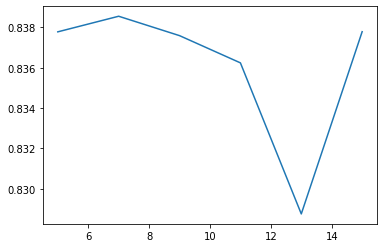

In [213]:
# Score vs K Nearest (From Euclidean Metric)
sns.lineplot(x=grid_search.cv_results_['param_n_neighbors'].data[1:7]  ,y=grid_search.cv_results_['mean_test_score'][1:7]);

#### Adjust the best model

In [214]:
from sklearn.neighbors import KNeighborsClassifier

# Se instancia el modelo
KNN = KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=7)

# Se ajusta el modelo
KNN.fit(X_train, y_train)

# Se realizan predicciones
y_pred = KNN.predict(X_test)

#### Performance of the best model

In [215]:
train_accuracy = KNN.score(X_train, y_train)
test_accuracy = KNN.score(X_test, y_test)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.88
Accuracy in Test  Group   : 0.84


In [216]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1047
           1       0.61      0.50      0.55       253

    accuracy                           0.84      1300
   macro avg       0.75      0.71      0.73      1300
weighted avg       0.83      0.84      0.83      1300



<AxesSubplot:>

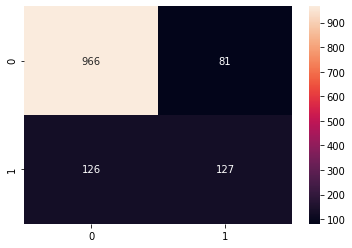

In [217]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

score = round(accuracy_score(y_test, y_pred), 3)
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")

## Conclusiones

In [219]:
print("El modelo con mejor precisión es el modelo Support Vector Machine, el cual tiene un valor de 0.88")

El modelo con mejor precisión es el modelo Support Vector Machine, el cual tiene un valor de 0.88


Como se menciona al inicio de este análisis, se identifica un bajo nivel de correlación entre las variables explciativas y la calidad del vino, por lo cual es de esperarse que las variables no sean las idoneas al tratar de clasificar el nivel de calidad de los vinos. Es importante resaltar que las categorías están desbalanceadas, es decir, la cantidad de vinos de baja calidad es mucho mayor que la cantidad de vinos de alta calidad. 

Ahora bien, se observa que el nivel de alcohol es similar en los vinos tintos y blancos, el nivel de cloruro es un poco más alto en los vinos de buena calidad, se puede observar que el nivel de acidez fija y acidez volatil son similares para las categorías de calidad. Mientras que el nivel de acidez citrica es un poco más alto en los vinos de alta calidad, el azucar residual es similar para los vinos de baja y alta calidad, el nivel de dióxido de azufre total es cada vez más alto en algunas clases de vino de baja calidad, el nivel de densidad toma valores más altos para los vinos de baja calidad, el nivel de PH es un poco más alto para los vinos de alta calidad y la concentración de cloruro es más alta para los vinos de buena calidad. Este análisis permite determinar las variables con mayor impacto sobre el clasificador. 

## Oportunidades de Mejora

## Conclusiones

- Replicar el ejercicio con oversampling / undersamplig para verificar los resultados.
- Implementar algoritmos como regresión logistica. 

